In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## To maintain the organization of this notebook, all of the required librarires shall be imported here.











---






In [2]:
## Import the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import yfinance as yf
import scipy as sp
from scipy import stats
import matplotlib.ticker as mtick
import math


## Get the historical data for SPY and RSP ETFs from Yahoo Finance

SPY = yf.download ('SPY', start = '2003-05-01', end = '2023-03-13')
RSP = yf.download ('RSP', start = '2003-05-01', end = '2023-03-13')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


### We'll begin with an EDA to get a sense of the data. We'll check for complete data, patterns, and test hypotheses.

### All statisitcal tests shall use the 'Adj Close' column for calculations. Adjusted close accounts for corportate actions after market close like dividends and stock splits, and gives more accurate representation of the cash value for that day.

---



In [ ]:
## Print the first 10 rows of each data sets.

SPY.head(10)
RSP.head(10)

print(SPY.head(10))
print(RSP.head(10)) 

                 Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2003-05-01  91.919998  92.730003  90.500000  91.900002  62.626629  50240400
2003-05-02  91.559998  93.470001  91.489998  93.209999  63.519363  50201500
2003-05-05  93.470001  93.779999  92.500000  93.029999  63.396671  35437800
2003-05-06  93.040001  94.379997  93.000000  93.910004  63.996380  44401000
2003-05-07  93.419998  94.139999  92.970001  93.389999  63.642021  41413100
2003-05-08  92.519997  93.330002  92.279999  92.449997  63.001423  40570700
2003-05-09  92.830002  93.800003  92.610001  93.730003  63.873711  33608100
2003-05-12  93.500000  95.120003  93.279999  94.879997  64.657394  35662300
2003-05-13  94.529999  95.180000  94.260002  94.709999  64.541534  39253600
2003-05-14  95.089996  95.239998  93.910004  94.510002  64.405235  32195100
                 Open       High        Low      Close  Adj Close  Volume
Date          

In [ ]:
## Print the last 10 rows of each data sets.


SPY.tail(10)
RSP.tail(10)

print(SPY.tail(10))
print(RSP.tail(10))

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-02-27  399.869995  401.290009  396.750000  397.730011  396.217834   
2023-02-28  397.230011  399.279999  396.149994  396.260010  394.753418   
2023-03-01  395.410004  396.690002  393.380005  394.739990  393.239197   
2023-03-02  392.679993  398.690002  392.329987  397.809998  396.297516   
2023-03-03  399.709991  404.450012  399.029999  404.190002  402.653259   
2023-03-06  405.049988  407.450012  404.010010  404.470001  402.932220   
2023-03-07  404.420013  404.670013  397.630005  398.269989  396.755768   
2023-03-08  398.390015  399.709991  396.589996  398.920013  397.403320   
2023-03-09  399.739990  401.480011  390.529999  391.559998  390.071289   
2023-03-10  390.989990  393.160004  384.320007  385.910004  384.442780   

               Volume  
Date                   
2023-02-27   80444700  
2023-02-28   96438600  
2023-03-01   99

In [ ]:
## Print the shape of each data set. From the output we can see both data sets contain the same number of columns and rows

SPY.shape
RSP.shape

print(SPY.shape)
print(RSP.shape)

(5000, 6)
(5000, 6)


In [ ]:
## Print the column names of both data sets. Columns are validated.

SPY.columns
RSP.columns

print(SPY.columns)
print(RSP.columns)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


In [ ]:
## Print information about the data sets.

print(SPY.info())
print(RSP.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2003-05-01 to 2023-03-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5000 non-null   float64
 1   High       5000 non-null   float64
 2   Low        5000 non-null   float64
 3   Close      5000 non-null   float64
 4   Adj Close  5000 non-null   float64
 5   Volume     5000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 273.4 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2003-05-01 to 2023-03-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5000 non-null   float64
 1   High       5000 non-null   float64
 2   Low        5000 non-null   float64
 3   Close      5000 non-null   float64
 4   Adj Close  5000 non-null   float64
 5   Volume     5000 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 273.4 KB
Non

In [ ]:
## Print & check that the 
## data sets are complete. 
SPY.isna().sum()
RSP.isna().sum()

print(SPY.isna().sum())
print(RSP.isna().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [ ]:
## Print a description summary for each of the columns in both data sets.

SPY.describe()
RSP.describe()

print(SPY.describe())
print(RSP.describe())

              Open         High          Low        Close    Adj Close  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    201.000834   202.163498   199.730734   201.018920   175.992118   
std     100.280334   100.861120    99.635581   100.290364   107.482399   
min      67.949997    70.000000    67.099998    68.110001    51.759586   
25%     123.259998   123.785002   122.425001   123.135000    91.740547   
50%     156.289993   156.825005   155.360001   156.215004   129.736534   
75%     265.010010   267.000000   263.010002   265.012505   244.228153   
max     479.220001   479.980011   476.059998   477.709991   468.296387   

             Volume  
count  5.000000e+03  
mean   1.237022e+08  
std    9.307318e+07  
min    8.055800e+06  
25%    6.202900e+07  
50%    9.352885e+07  
75%    1.549452e+08  
max    8.710263e+08  
              Open         High          Low        Close    Adj Close  \
count  5000.000000  5000.000000  5000.000000  5000.000000  50



---





---



In [ ]:
# Calculate the mean and standard deviation of daily returns for SPY and RSP
spy_mean = SPY['Adj Close'].pct_change().mean()
rsp_mean = RSP['Adj Close'].pct_change().mean()
spy_std = SPY['Adj Close'].pct_change().std()
rsp_std = RSP['Adj Close'].pct_change().std()

print('SPY mean daily return:', spy_mean)
print('RSP mean daily return:', rsp_mean)
print('SPY daily return standard deviation:', spy_std)
print('RSP daily return standard deviation:', rsp_std)

SPY mean daily return: 0.0004351368080048556
RSP mean daily return: 0.0004855135404530788
SPY daily return standard deviation: 0.011999339742824086
RSP daily return standard deviation: 0.012970556377566642


# Hypothesis 1 - The performance of SPY and RSP is significantly different;


Null - The mean return of SPY and RSP is the same -  Ho: μ1 - μ2 = 0.


Alternate - The mean return of SPY and RSP is not the same - Ha: μ1 - μ2 ≠ 0.

This hypothesis shall be tested using a two sample independent samples t-test, assuming unequal variance.

In [ ]:
# Perform a t-test to test hypothesis 1
ttest_result = stats.ttest_ind(SPY['Adj Close'], RSP['Adj Close'], equal_var=False)
print('T-test result:', ttest_result)

T-test result: Ttest_indResult(statistic=69.57437314083636, pvalue=0.0)


In this case, the p-value is so small, that SciPy rounds the value to 0.0. 

We can reject the Null hypothesis that the mean returns of SPY and RSP is the same and accept the Alternate. - p < 0.05.

In [ ]:
sample_1_n = SPY.shape[0]
sample_2_n = RSP.shape[0]
sample_1_mean = SPY['Adj Close'].mean()
sample_2_mean = RSP['Adj Close'].mean()
sample_1_var = SPY['Adj Close'].var()
sample_2_var = RSP['Adj Close'].var()

print('Number of rows in SPY:', sample_1_n)
print('Number of rows in RSP:', sample_2_n)
print('SPY mean Adjusted Close:', sample_1_mean)
print('RSP mean Adjusted Close:', sample_2_mean)
print('SPY var Adjusted Close:', sample_1_var)
print('RSP var Adjusted Close:', sample_2_var)

# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

Number of rows in SPY: 5000
Number of rows in RSP: 5000
SPY mean Adjusted Close: 175.9921176185608
RSP mean Adjusted Close: 63.828610354614256
SPY var Adjusted Close: 11552.466097806766
RSP var Adjusted Close: 1442.4823801034524
The difference in means at the 95% confidence interval is between -115.32329820870032 and -109.00371631919276.




---



# Hypothesis 2; The daily returns of SPY and RSP are positively correlated.

Null - There is no correlation between the daily returns of SPY and RSP - Ho: μ1 - μ2 = 0.

Alternate - There is a positive correlation between the daily returns of SPY and RSP - Ha: μ1 - μ2 ≠ 0.

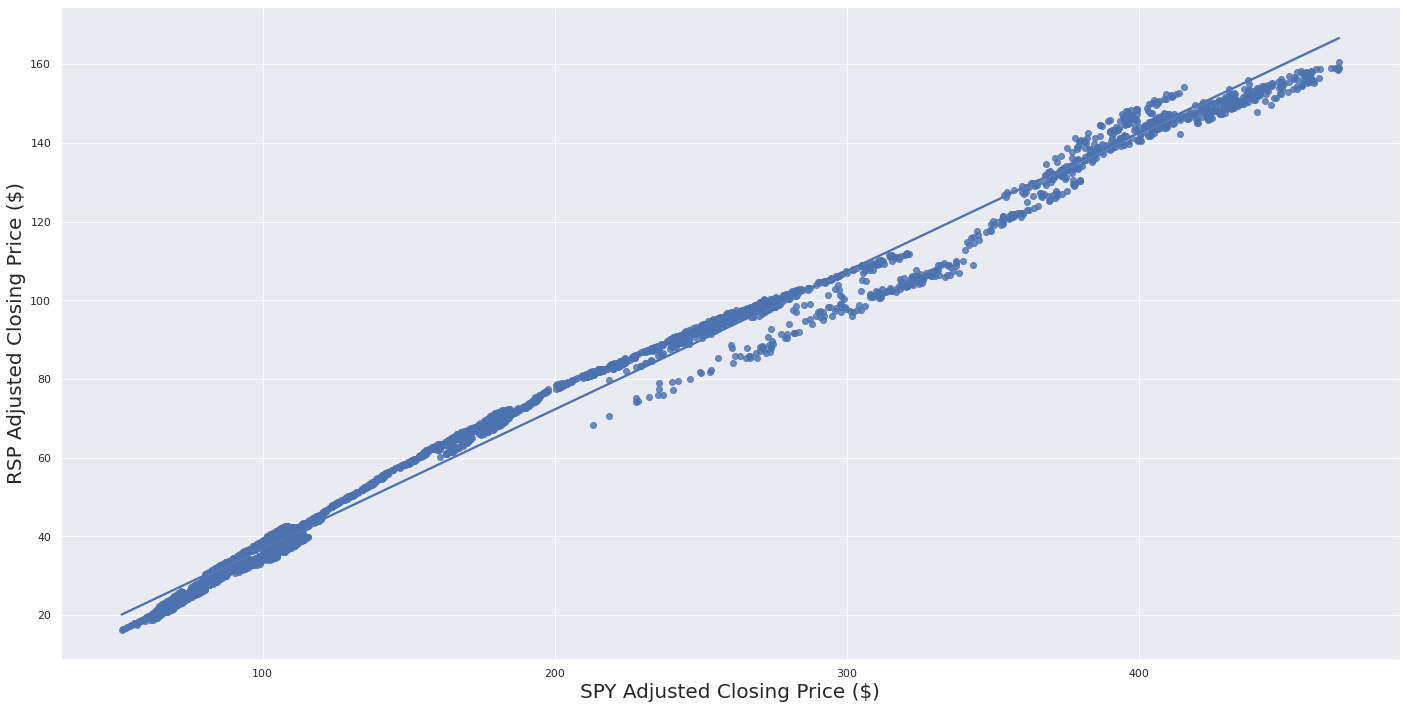

LinregressResult(slope=0.351755135256903, intercept=1.9224796258540309, rvalue=0.9954570842597846, pvalue=0.0, stderr=0.0004758919031486714, intercept_stderr=0.0981346119279538)


In [ ]:
# Regression Analysis
# Create a DataFrame with the adjusted closing price for both funds
df = pd.concat([SPY['Adj Close'], RSP['Adj Close']], axis=1)
df.columns = ['SPY', 'RSP']
df.dropna(inplace=True)


# Create a scatter plot of RSP vs. SPY
plt.figure(figsize=(24,12))
sns.set(style='darkgrid')
sns.regplot(x='SPY', y='RSP', data=df)
plt.xlabel('SPY Adjusted Closing Price ($)', fontsize = 20)
plt.ylabel('RSP Adjusted Closing Price ($)', fontsize = 20)
plt.rc ('xtick', labelsize = 16)    
plt.rc('ytick', labelsize = 16)
plt.show()

# Fit a linear regression model to the data
model = sp.stats.linregress(df['SPY'], df['RSP'])
print(model)


In this case, the p-value is so small, SciPy has rounded it to 0.0. We can reject the Null hypothesis that there is no correlation between the daily returns of SPY and RSP and accept the Alternate. - p < 0.05.



---



Based on the regression model above, we can project the price of RSP when the price of SPY is x.


In [ ]:
# Predict the RSP price when the price of SPY is ....

# SPY_price can be manipulated in order to project the price of RSP in the output.

spy_price = 474.97  ## $474.96 is the all time high for SPY. 
rsp_price = model.intercept + model.slope * spy_price
print(f'Predicted RSP price when SPY is {spy_price}: ${rsp_price:.2f}')

Predicted RSP price when SPY is 474.97: $169.00


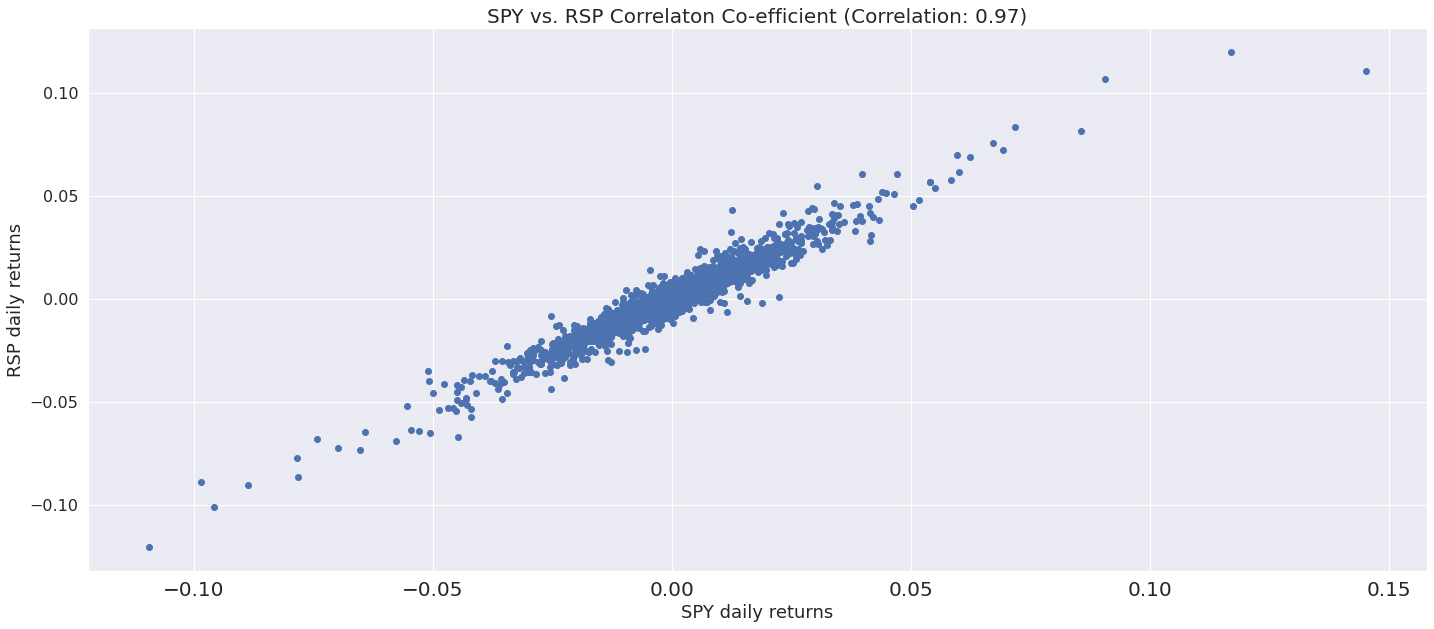

In [ ]:
# calculate daily returns
spy_returns = spy.pct_change().dropna()
rsp_returns = rsp.pct_change().dropna()

# calculate correlation coefficient
correlation = spy_returns.corr(rsp_returns)

# plot scatter plot of daily returns
plt.figure(figsize=(24,10))
plt.scatter(spy_returns, rsp_returns)
plt.title(f"SPY vs. RSP Correlaton Co-efficient (Correlation: {correlation:.2f})", fontsize = 20)
plt.xlabel("SPY daily returns", fontsize = 18)
plt.ylabel("RSP daily returns", fontsize = 18)
plt.rc('xtick', labelsize = 16)
plt.rc('ytick', labelsize = 16)
plt.show()

In [ ]:
# calculate the statistical significance of the correlation using a Pearsons correlation test.

stats.pearsonr(spy_returns, rsp_returns)

PearsonRResult(statistic=0.9668988477868806, pvalue=0.0)

In this case, the p-value is so small, that SciPy has rounded it to 0.0. 

We can reject the Null hypothesis that there is no correlations between the daily returns of SPY and RSP and accept the Alternate. - p < 0.05.



---



---



## Additional Visualizations of the data sets.

---



---



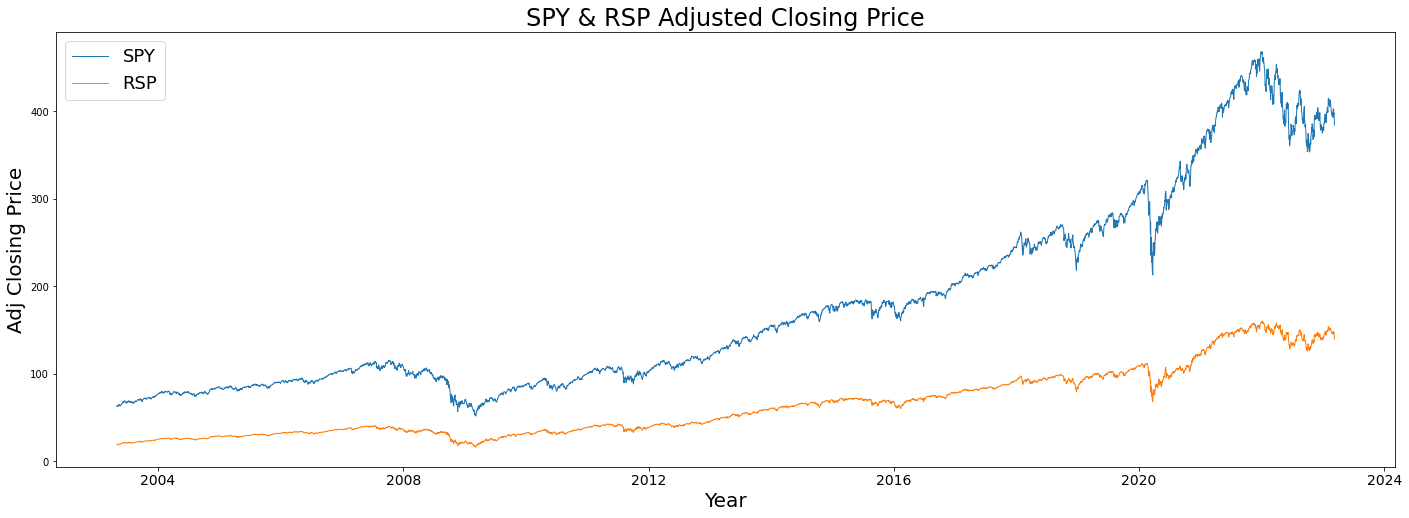

In [6]:
## Plot the adjusted closing price for SPY and RSP
plt.figure(figsize=(24,8))
plt.plot(SPY['Adj Close'], label = 'SPY', linewidth = 1)
plt.plot(RSP['Adj Close'], label = 'RSP', linewidth = 1)
plt.legend(loc = 'upper left', fontsize =18)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Adj Closing Price', fontsize = 20)
plt.rc('xtick', labelsize = 16)    
plt.rc('ytick', labelsize = 16)
plt.title('SPY & RSP Adjusted Closing Price', fontsize = 24)
plt.show()

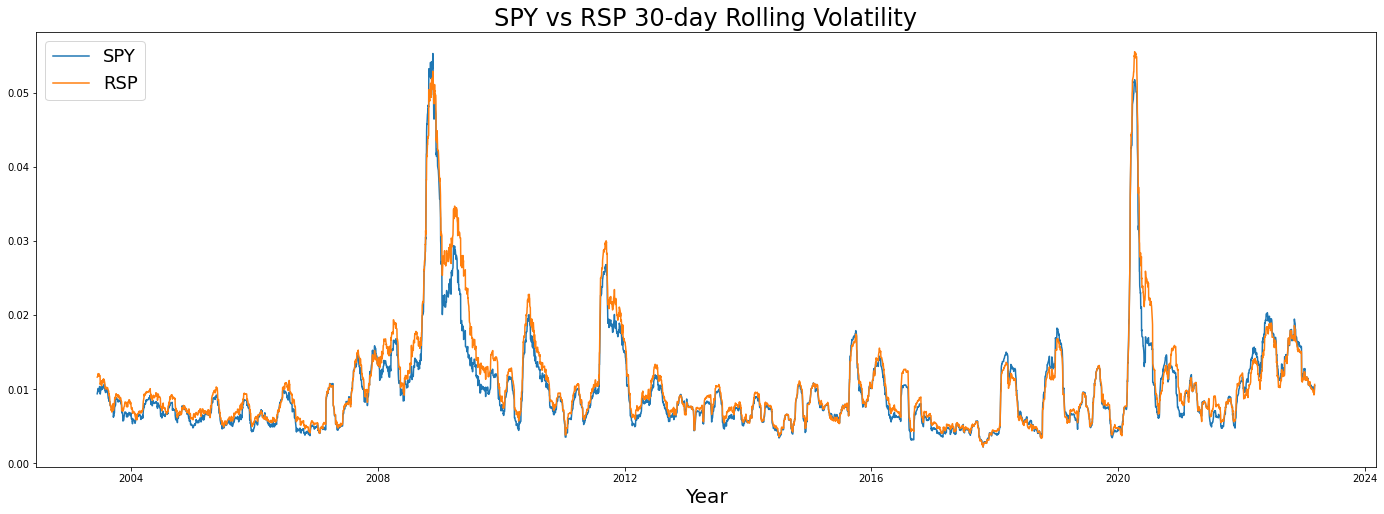

In [5]:
## Plot the 30-day rolling volatility of SPY and RSP
plt.figure(figsize=(24,8))
plt.plot(SPY['Adj Close'].pct_change().rolling(30).std(), label = 'SPY')
plt.plot(RSP['Adj Close'].pct_change().rolling(30).std(), label = 'RSP')
plt.legend(loc = 'upper left', fontsize = 18)
plt.xlabel('Year', fontsize = 20)
plt.rc('xtick', labelsize = 14)    
plt.title('SPY vs RSP 30-day Rolling Volatility', fontsize = 24)
plt.show()

Date
2003-05-02    10142.548085
2003-05-05    10122.953388
2003-05-06    10218.714559
2003-05-07    10162.131818
2003-05-08    10059.843955
                  ...     
2023-03-06    64338.793035
2023-03-07    63352.558905
2023-03-08    63455.957798
2023-03-09    62285.204959
2023-03-10    61386.464449
Name: Adj Close, Length: 4999, dtype: float64
Date
2003-05-02    10186.313299
2003-05-05    10207.884007
2003-05-06    10289.272098
2003-05-07    10249.073203
2003-05-08    10138.269036
                  ...     
2023-03-06    78696.095784
2023-03-07    77427.051761
2023-03-08    77590.973326
2023-03-09    75877.772005
2023-03-10    74275.614062
Name: Adj Close, Length: 4999, dtype: float64


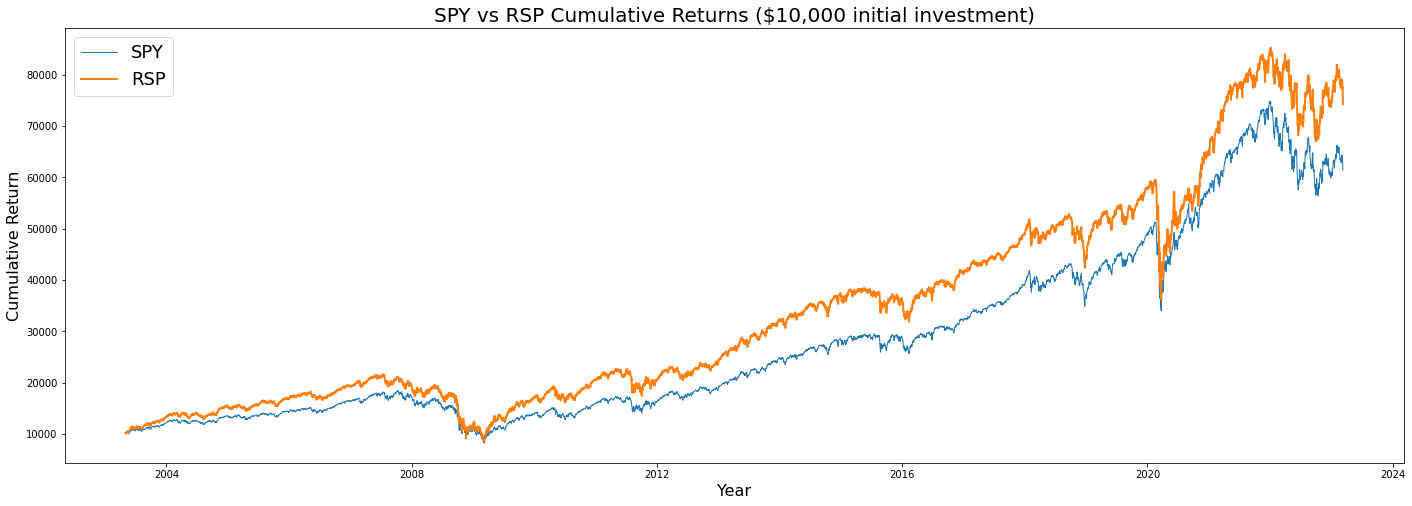

In [4]:
## Visualize a hypothetical $10,000 in both funds to assess returns.
initial_investment = 10000

spy_returns = SPY['Adj Close'].pct_change()[1:]
rsp_returns = RSP['Adj Close'].pct_change()[1:]

# Calculate the cumulative returns for SPY and RSP
spy_cumulative_returns = (1+spy_returns).cumprod() * initial_investment
rsp_cumulative_returns = (1+rsp_returns).cumprod() * initial_investment

print(spy_cumulative_returns)
print(rsp_cumulative_returns)

# Plot the cumulative returns for SPY and RSP
plt.figure(figsize=(24,8))
plt.plot(spy_cumulative_returns, label='SPY', linewidth = 1)
plt.plot(rsp_cumulative_returns, label='RSP', linewidth = 2)
plt.legend(loc = 'upper left', fontsize = 18)
plt.title('SPY vs RSP Cumulative Returns ($10,000 initial investment)', fontsize = 20)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Cumulative Return', fontsize = 16)
plt.show()

Investing 10,000 in May of 2003 in to SPY would now be worth 61,386. Represents an increase of 513.85%.

Investing 10,000 in May of 2003 in to RSP would now be worth 74,275. Represents an increase of 642.75%


My findings add value because the data insights can be used to guide future capital allocation. Financial advisors, investment banks and hedge funds could use this data to allocate clients funds, or use the data to provide data driven decisions for clients looking for different investment strategies. 
